## Test de $P(A|W_0,W_1,\dots,W_n)$ y $P(A|W_0,W_1,\dots,W_r,W_{r+1},\dots,W_n)$

In [1]:
import tpproc as tp
from collections import Counter  #regresa un diccionario con conteos
import glob
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import OrderedDict #diccionarios ordenados
import numpy as np
import mib_v2_3_lg as mb

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/roberto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/roberto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
archivos = glob.glob('./Train/*/*')
archivos,nombres = tp.carga_cuentos(archivos)
df_train = tp.lee_cuentos(archivos)
df_train.head()

leyendo...
tamaño del contenido de archivos cargados:             1 KB


,titulo,tipo,autor,texto
0,la sombra,minicuento,gibrán jalil gibrán,cierto día junio hierba dijo sombra olmo mueve...
1,la búsqueda,cuento,gibrán jalil gibrán,hace mil años dos filósofos encontraron cuesta...
2,dos poemas,cuento,gibrán jalil gibrán,varios siglos atrás camino atenas encontraron ...
3,"aquel viejo, viejo vino",cuento,gibrán jalil gibrán,vez hombre rico orgulloso bodega vino allí vas...
4,tres regalos,cuento,gibrán jalil gibrán,cierta vez ciudad becharre vivía amable prínci...


In [3]:
archivos = glob.glob('./Test/El Caballo y el Lobo.txt')
archivos,nombres = tp.carga_cuentos(archivos)
df_test = tp.lee_cuentos(archivos,test=True)
df_test.head()

leyendo...
tamaño del contenido de archivos cargados:             0 KB


,titulo,texto
0,el caballo y el lobo,estación blandos céfiros hacen verdear campos ...


In [4]:
df_train = df_train.query('autor ==  "gibrán jalil gibrán" or autor ==  "jean de la fontaine" or autor ==  "juan carlos onetti"')

In [5]:
s = df_train[df_train['autor'] == 'jean de la fontaine'].texto.str.cat(sep=' ').split()
conteos = Counter(s)
autor_vocabulario = set([palabra for palabra in s])
print(len(autor_vocabulario))

377


In [6]:
s = df_test.texto.str.cat(sep=' ').split()
conteos = Counter(s)
vocab_test = set([palabra for palabra in s])
print(len(vocab_test))

106


In [7]:
from itertools import product
# Creación de variables

# Vraible para autor
# Ocurrencias de cada autor y conteos de ocurrencias y de número de autores
oc_autor = Counter(df_train.autor)
tot_oc_aut = np.sum(list(oc_autor.values()))
tot_autores = len(oc_autor)
A = mb.Var('A', set([autor for autor in oc_autor]))
# Distribución P(A)
n_= []
for autor in oc_autor:
    n_.append(((autor,),oc_autor[autor]/tot_oc_aut))

# Dicionario de valores de probabilidad
dA = dict(n_)
# Distribución de probabilidad
PA = mb.Distrib(table = dA, columns=('A',))
print(A.getValues())
PA.print_table()


# Variable para tipos
# Ocurrencias de cada tipo y conteos de ocurrencias y de número de tipos
oc_tipo = Counter(df_train.tipo)
tot_oc_tipo = np.sum(list(oc_tipo.values()))
tot_tipos = len(oc_tipo)
T = mb.Var('T', set([tipo for tipo in oc_tipo]))

# Distribución P(T|A)

# Ocurrencias (conteos) de cada combinación (tipo,autor)
conteo_pares = Counter(zip(df_train.autor,df_train.tipo))
# Combinaciones (tipo,autor)
autores = list(set(df_train.autor))
tipos = list(set(df_train.tipo))

dT_A = {}

for autor, tipo in product(*[autores,tipos]):
    par = (autor, tipo)
    ak = (autor,)
    
    if ak in dT_A.keys():
        if par in conteo_pares.keys():
            dT_A[ak][(tipo,)] = conteo_pares[par]
        else:
            dT_A[ak][(tipo,)] = 0 
    else:
        if par in conteo_pares.keys():
            dT_A[ak] = {(tipo,): conteo_pares[par]}
        else:
            dT_A[ak] = {(tipo,): 0}
            
# Corrección de Laplace en el caso general
# Se corrige la misma tabla que se senvía como argumento; no se crea una nueva.
def Laplace_gral(tabla):
    n = len(tabla[list(tabla.keys())[0]]) 
    for k in tabla.keys():
        registro = tabla[k]
        n_j = np.sum(list(registro.values()))
        for i in registro.keys():
            pb = (registro[i] + 1)/(n_j+n)
            tabla[k][i]=pb

Laplace_gral(dT_A)

PT_A = mb.CondDistrib(dT_A, (T.getName(),), (A.getName(),))
PT_A.print_table()

['juan carlos onetti', 'gibrán jalil gibrán', 'jean de la fontaine']
{('gibrán jalil gibrán',): 0.45454545454545453, ('jean de la fontaine',): 0.36363636363636365, ('juan carlos onetti',): 0.18181818181818182}
{('juan carlos onetti',): {('minicuento',): 0.25, ('cuento',): 0.75}, ('gibrán jalil gibrán',): {('minicuento',): 0.2857142857142857, ('cuento',): 0.7142857142857143}, ('jean de la fontaine',): {('minicuento',): 0.8333333333333334, ('cuento',): 0.16666666666666666}}


In [8]:
from itertools import product
# Creación de variables

# Vraible para autor
# Ocurrencias de cada autor y conteos de ocurrencias y de número de autores
oc_autor = Counter(df_train.autor)
tot_oc_aut = np.sum(list(oc_autor.values()))
tot_autores = len(oc_autor)
A = mb.Var('A', set([autor for autor in oc_autor]))
# Distribución P(A)
n_= []
for autor in oc_autor:
    n_.append(((autor,),oc_autor[autor]/tot_oc_aut))

# Dicionario de valores de probabilidad
dA = dict(n_)
# Distribución de probabilidad
PA = mb.Distrib(table = dA, columns=('A',))
print(A.getValues())
PA.print_table()


# Variable para tipos
# Ocurrencias de cada tipo y conteos de ocurrencias y de número de tipos
oc_tipo = Counter(df_train.tipo)
tot_oc_tipo = np.sum(list(oc_tipo.values()))
tot_tipos = len(oc_tipo)
T = mb.Var('T', set([tipo for tipo in oc_tipo]))

# Distribución P(T|A)

# Ocurrencias (conteos) de cada combinación (tipo,autor)
conteo_pares = Counter(zip(df_train.autor,df_train.tipo))
# Combinaciones (tipo,autor)
autores = list(set(df_train.autor))
tipos = list(set(df_train.tipo))

dT_A = {}

for autor, tipo in product(*[autores,tipos]):
    par = (autor, tipo)
    ak = (autor,)
    
    if ak in dT_A.keys():
        if par in conteo_pares.keys():
            dT_A[ak][(tipo,)] = conteo_pares[par]
        else:
            dT_A[ak][(tipo,)] = 0 
    else:
        if par in conteo_pares.keys():
            dT_A[ak] = {(tipo,): conteo_pares[par]}
        else:
            dT_A[ak] = {(tipo,): 0}
            
# Corrección de Laplace en el caso general
# Se corrige la misma tabla que se senvía como argumento; no se crea una nueva.
def Laplace_gral(tabla):
    n = len(tabla[list(tabla.keys())[0]]) 
    for k in tabla.keys():
        registro = tabla[k]
        n_j = np.sum(list(registro.values()))
        for i in registro.keys():
            pb = (registro[i] + 1)/(n_j+n)
            tabla[k][i]=pb

Laplace_gral(dT_A)

PT_A = mb.CondDistrib(dT_A, (T.getName(),), (A.getName(),))
PT_A.print_table()

['juan carlos onetti', 'gibrán jalil gibrán', 'jean de la fontaine']
{('gibrán jalil gibrán',): 0.45454545454545453, ('jean de la fontaine',): 0.36363636363636365, ('juan carlos onetti',): 0.18181818181818182}
{('juan carlos onetti',): {('minicuento',): 0.25, ('cuento',): 0.75}, ('gibrán jalil gibrán',): {('minicuento',): 0.2857142857142857, ('cuento',): 0.7142857142857143}, ('jean de la fontaine',): {('minicuento',): 0.8333333333333334, ('cuento',): 0.16666666666666666}}


In [9]:
vocab_inter = vocab_test & autor_vocabulario
vocab_dif = autor_vocabulario - vocab_test 

print(len(vocab_inter))
print(len(vocab_dif))

nuevo_vocab = vocab_inter.copy()

ps_rn = []
ps_n = []
xn_p = []

for i in range(15):
    print(i)
    xn_p.append(len(nuevo_vocab))
    df_train_T = df_train.copy()
    df_train_T['nuevo_texto'] = df_train_T.texto.str.split().\
        apply(lambda texto: [w for w in texto if w in nuevo_vocab]).\
        apply(lambda x : ' '.join(x))
    df_train_T['Conteos']=df_train_T.nuevo_texto.str.split().apply(Counter)
    
    
    
    # Palabras
    W = {}
    for w in nuevo_vocab:    # vocabulario reducido
        W[w] = mb.Var(w,set([0,1]))
    
    # Combinaciones (tipo,autor)
    autores = list(set(df_train_T.autor))
    tipos = list(set(df_train_T.tipo))
    pares_ta = list(product(autores,tipos))

    # Conteos de palabras en nuevo_texto por pares (a,t) en el data frame de train
    conteo_w = dict(df_train_T.Conteos)
    pares_train = list(zip(df_train_T.autor,df_train_T.tipo))

    for i,k in enumerate(conteo_w.keys()):
        conteo_w[k] = {pares_train[i] : dict(conteo_w[k])}
        
    def check(palabra,pares_ta):
        pw_ = {}
        var = W[palabra]
        
        for par in pares_ta:
            cw_1 = 0   # conteos de presencia 
            cw_0 = 0   # y ausencia en 0
            it = 0     # total de pares (a,t) contabilizados
            
            for item in list(conteo_w.values()):  # checamos cada par (a,t) en el conjunto de train
                # print(i,list(item.keys())[0], end=' ')
                it += 1
                if par in item: # checamos si el par (a,t) de entrada tiene correspondencia en Train
                    if palabra in list(item.values())[0]: #checamos si la palabra existe en el par (a,t) de Train
                        cw_1 += 1
                    else:
                        cw_0 += 1  #debemos contar también la no existencia por si hay igualdad
            
            if cw_0 == cw_1: # la palabra aparece por igual en todos los pares Train, o bien, no hay pares Train
                pw_1 = 0.5   #corrección de Laplace que indica que la palabra puede o no estar por igual
                pw_0 = 0.5
                
            else:
                pw_1=(1+cw_1)/(len(var.getValues())+it) #corrección de Laplace en caso de que la palabra exista
                pw_0 = 1-pw_1
            
            pw_[par] = {(0,): pw_0, (1,): pw_1}
        pw_ = OrderedDict(sorted(pw_.items()))
        return pw_
            
        
    PW_AT = {}
    for w in nuevo_vocab:    # vocabulario reducido
        t = check(w,pares_ta)
        PW_AT[w] = mb.CondDistrib(dict(t), (W[w].getName(),), (A.getName(), T.getName()))
        
    vars_set = set([A,T] + [W[w] for w in W]) 
    descomp_set = set([PA, PT_A] + [PW_AT[w] for w in W])
    PATW = mb.Specification(vars_set, descomp_set)
    
    Q_PATW = mb.Question(PATW)
    
    values_wi = []
    for w in W:
        if w in vocab_inter:
            values_wi.append(1)
        else:
            values_wi.append(0)
    
    p = Q_PATW.Query(vars=tuple([A]), indep=tuple([W[w] for w in W]), values_var = tuple(['jean de la fontaine']),values_indep = values_wi)
    ps_n.append(p)
    
    indep_wi = tuple([W[w] for w in vocab_inter])
    values_iwi = tuple([1 for w in indep_wi])
    p = Q_PATW.Query(vars=tuple([A]), indep = indep_wi, values_var = tuple(['jean de la fontaine']),values_indep = values_iwi)
    ps_rn.append(p)
    
    nuevo_vocab.add(vocab_dif.pop())
    

20
357
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


- $P(A,T,W_1,\dots,W_n) = P(A)P(T|A) \prod_{i=1}^{n} {P(W_i|AT)}$

- $log_{10}(P(A,T,W_1,\dots,W_n)) = log_{10}(P(A)P(T|A) \prod_{i=1}^{n} {P(W_i|AT)}) = log_{10}(P(A)) + log_{10}(P(T|A)) \sum_{i=1}^{n} log_{10}(P(W_i|AT))$

$P(A|W_1,\dots,W_r) = \frac{P(A,W_1,\dots,W_r)}{P(W_1,\dots,W_n)}$

- $ log_{10}(P(A|W_1,\dots,W_r)) = log_{10}( \frac{P(A,W_1,\dots,W_r)}{P(W_1,\dots,W_n)} ) = log_{10}(P(A,W_1,\dots,W_r)) - log_{10}(P(W_1,\dots,W_n))$

- $ P(A,W_1,\dots,W_r) = \sum_{T,W_{r+1},\dots,W_n} {P(A)P(T|A) \prod_{i=1}^{n} {P(W_i|AT)}}$
- $ P(W_1,\dots,W_r) = \sum_{A,T,W_{r+1},\dots,W_n} {P(A)P(T|A) \prod_{i=1}^{n} {P(W_i|AT)}}$


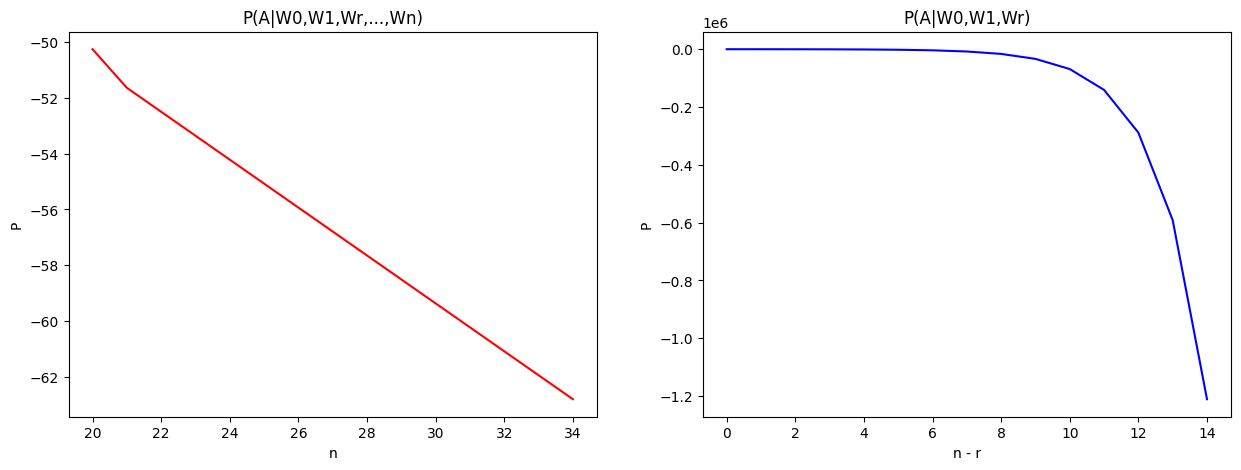

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15,5)

axs[0].plot(xn_p, ps_n, color = 'r',label = "Como decisión")
axs[0].set_title("P(A|W0,W1,Wr,...,Wn)")
axs[0].set_xlabel("n")
axs[0].set_ylabel("P")


axs[1].plot([n-20 for n in xn_p], ps_rn, color = 'b', label = "Con división")
axs[1].set_title("P(A|W0,W1,Wr)")
axs[1].set_xlabel("n - r")
axs[1].set_ylabel("P")
plt.show()

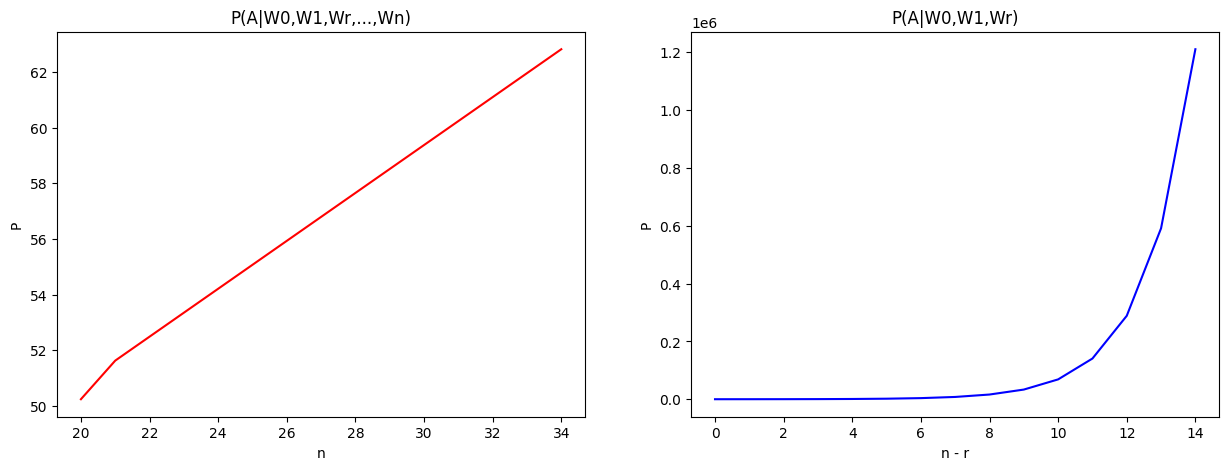

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15,5)

axs[0].plot(xn_p, [-i for i in ps_n], color = 'r',label = "Como decisión")
axs[0].set_title("P(A|W0,W1,Wr,...,Wn)")
axs[0].set_xlabel("n")
axs[0].set_ylabel("P")


axs[1].plot([n-20 for n in xn_p], [-i for i in ps_rn], color = 'b', label = "Con división")
axs[1].set_title("P(A|W0,W1,Wr)")
axs[1].set_xlabel("n - r")
axs[1].set_ylabel("P")
plt.show()